# Shubhangi Agrawal


# Task 1- Prediction using Supervised Machine Learning

Simple Linear Regression

This is the first task given under the internship programme of The Sparks Foundation.


Problem Statement:

In this task, we have to predict the percentage of marks that a student is expected to score, based upon the number of hours he studies.

# <font color=black>IMPORTING REQUIRED LIBRARIES</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# <font color=black>LOADING DATA</font>

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data Loading Successful")

Data Loading Successful


In [3]:
# Lets have a quick look into the data
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
Hours = Hours = np.array([data.Hours]).reshape((-1,1))
Hours

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [5]:
Scores = np.array(data.Scores)
Scores

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [6]:
#Lets have a summary of our data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# <font color=black>DATA VISUALIZATION</font>

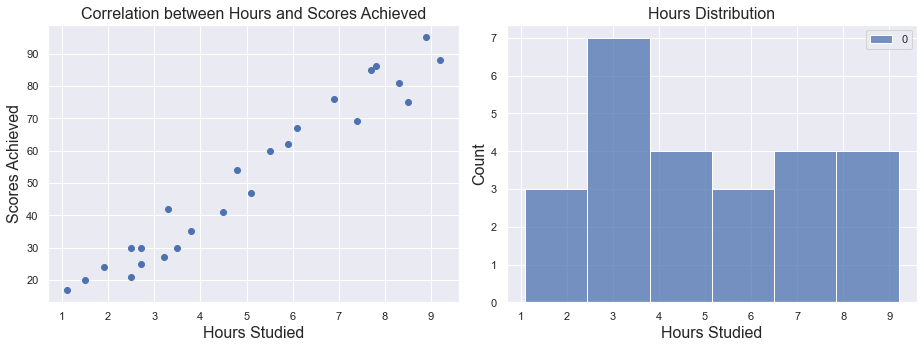

In [7]:
#Plotting the distribution of scores
plt.rcParams['figure.figsize'] = (13, 5)

plt.subplot(121)
plt.scatter(x = Hours, y = Scores)
plt.xlabel('Hours Studied', fontsize = 16)
plt.ylabel('Scores Achieved', fontsize = 16)
plt.title("Correlation between Hours and Scores Achieved", fontsize = 16)

plt.subplot(122)
sns.histplot(Hours)
plt.xlabel("Hours Studied", fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title("Hours Distribution", fontsize= 16)

plt.tight_layout()
plt.show()

The graph shows that there is a positive linear relation between the number of hours studied and percentage of score.

# <font color=black>SPLITTING THE DATA</font>

We have split the data into independant and dependant features(Hours, Scores). Then, we will divide them into training and test sets by using Scikit-Learn's built-in train_test_split() method with the ratio of 70:30.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
# split the features into training and test sets
x_train, x_test, y_train, y_test = train_test_split(Hours, Scores, test_size = 0.30, random_state = 42)

# <font color=black>TRAINING THE ALGORITHM</font>

In [9]:
# initialize the model
model = LinearRegression()

# train the model on training set
model.fit(x_train, y_train)

print("Training complete.")

Training complete.


In [10]:
print("y intercept:",model.intercept_)
print("slope:",model.coef_)

y intercept: 2.794196676599803
slope: [9.71054094]


# <font color=black>PLOTTING THE REGRESSION LINE</font>

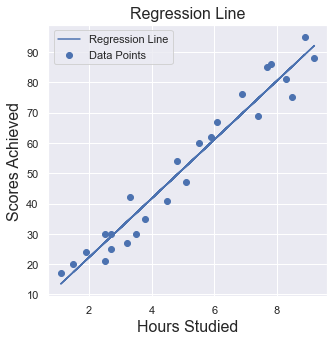

In [11]:
line = model.coef_ * Hours + model.intercept_
plt.rcParams['figure.figsize'] = (5,5)
plt.scatter(Hours, Scores, label = 'Data Points')
plt.plot(Hours, line, label = 'Regression Line')
plt.legend()
plt.xlabel("Hours Studied", fontsize = 16)
plt.ylabel("Scores Achieved", fontsize = 16)
plt.title("Regression Line", fontsize = 16)
plt.show()

# <font color=black>EVALUATING THE MODEL</font>

Making predictions on the test set and evaluating our model.

In [12]:
#make predictions on test set
prediction = model.predict(x_test)
print(x_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]
 [2.7]
 [3.3]
 [5.1]]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df

,Actual,Predicted
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955



The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [14]:
from sklearn.metrics import mean_absolute_error

# calculatING the error
err = mean_absolute_error(y_test, prediction)
print("Mean Absolute Error: ", err)

Mean Absolute Error:  4.499999999999998


# <font color=black>MAKE PREDICTIONS</font>

What will be predicted score if a student studies for 9.25 hrs/ day?

In [15]:
hours = [[9.25]]

predict_score = model.predict(hours)
print("Hours:", hours[0][0])
print("Predicted Score:", predict_score[0])

Hours: 9.25
Predicted Score: 92.61670033840096
